In [1]:
#  create classifier for time series data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize


In [37]:
# view rr_interval_data from health_data folder
rr_df = pd.read_csv('/workspaces/Michelle_Li_NLP_Final/health_data/rr_interval_data.csv')

# drop the first column
rr_df = rr_df.drop(columns=['Unnamed: 0'])

rr_df.head()

,sample_id,index,rr_interval
0,0,0,856
1,0,1,856
2,0,2,856
3,0,3,865
4,0,4,837


In [38]:
# max index of each sample_id
rr_df.groupby('sample_id')['index'].transform(max).value_counts()

204    3895
143    3600
167    3192
145    3066
187    3008
       ... 
80       81
78       79
77       78
76       77
63       64
Name: index, Length: 157, dtype: int64

In [39]:
# view series_data from health_data folder
series_df = pd.read_csv('/workspaces/Michelle_Li_NLP_Final/health_data/series_data.csv')

# drop the first column
series_df = series_df.drop(columns=['Unnamed: 0'])

series_df.head()

,sample_id,user_id,target_class
0,0,15869254-d5cd-4fb9-b035-811bea855fd8,0
1,1,15869254-d5cd-4fb9-b035-811bea855fd8,0
2,2,15869254-d5cd-4fb9-b035-811bea855fd8,0
3,3,15869254-d5cd-4fb9-b035-811bea855fd8,0
4,4,15869254-d5cd-4fb9-b035-811bea855fd8,0


In [40]:
# combine the two dataframes based on sample_id
df = pd.merge(rr_df, series_df, on='sample_id')
df.head()
# save as csv
df.to_csv('/workspaces/Michelle_Li_NLP_Final/health_data/combined_data.csv', index=False)

In [41]:
# load combined_data.csv
df = pd.read_csv('/workspaces/Michelle_Li_NLP_Final/health_data/combined_data.csv')

In [42]:
# classify the data based on target_class
df['target_class'].value_counts()

0    94288
1    43470
2    30450
Name: target_class, dtype: int64

In [43]:
# look at rr_interval data based on target_class
sns.boxplot(x='target_class', y='rr_interval', data=df)
# title
plt.title('Boxplot of RR Interval Data')
# x label
plt.xlabel('Target Class')
# y label
plt.ylabel('RR Interval')

KeyboardInterrupt: 

In [ ]:
# sample_id where target_class is 1 and sort by sample_id
df[df['target_class'] == 1]['sample_id'].value_counts().sort_index()

918     182
919     200
920     203
921     199
922     201
       ... 
1152    151
1153    199
1154    189
1155    107
1156    169
Name: sample_id, Length: 211, dtype: int64

In [ ]:
# sample_id where target_class is 2 and sort by sample_id
df[df['target_class'] == 2]['sample_id'].value_counts().sort_index()

671     126
672     119
673     121
674     123
675     121
       ... 
1063    141
1064     85
1065    155
1066    157
1067    154
Name: sample_id, Length: 187, dtype: int64

Text(0, 0.5, 'RR Interval')

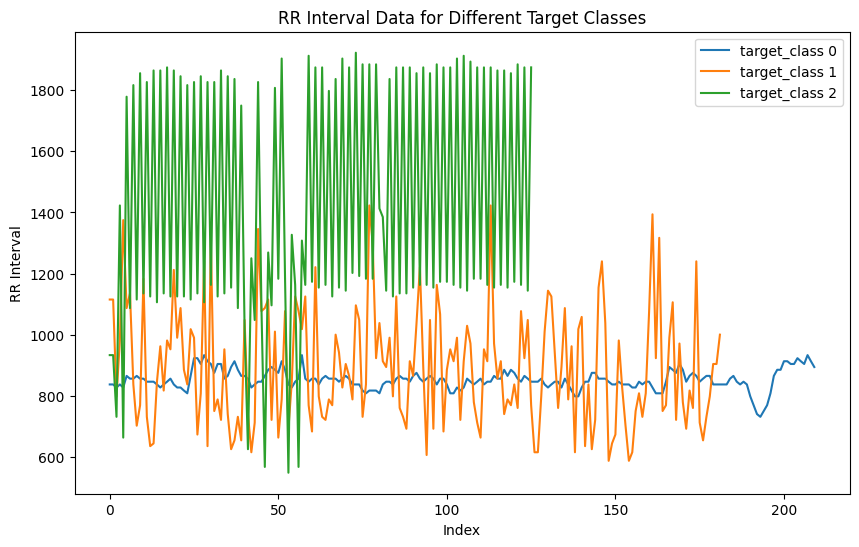

In [ ]:
# visualize one sample_id for each target_class on same plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='index', y='rr_interval', data=df[df['sample_id'] == 1], ax=ax, label='target_class 0')
sns.lineplot(x='index', y='rr_interval', data=df[df['sample_id'] == 918], ax=ax, label='target_class 1')
sns.lineplot(x='index', y='rr_interval', data=df[df['sample_id'] == 671], ax=ax, label='target_class 2')
# title
plt.title('RR Interval Data for Different Target Classes')
# x label
plt.xlabel('Index')
# y label
plt.ylabel('RR Interval')

In [ ]:
# number of unique sample_ids
df['sample_id'].nunique()

994

In [ ]:
# check for duplicates 
print('Duplicates: ', df.duplicated().sum().any())

# check for null values
print('Null Values: ', df.isnull().sum().any())

Duplicates:  False
Null Values:  False


In [ ]:
df.head()

,sample_id,index,rr_interval,user_id,target_class
0,0,0,856,15869254-d5cd-4fb9-b035-811bea855fd8,0
1,0,1,856,15869254-d5cd-4fb9-b035-811bea855fd8,0
2,0,2,856,15869254-d5cd-4fb9-b035-811bea855fd8,0
3,0,3,865,15869254-d5cd-4fb9-b035-811bea855fd8,0
4,0,4,837,15869254-d5cd-4fb9-b035-811bea855fd8,0


In [ ]:
# number of unique rr_interval values
df['rr_interval'].nunique()

1280

In [ ]:
df.head()

,sample_id,target_class,rr_interval
0,0,0,"[856, 856, 856, 865, 837, 846, 856, 856, 837, ..."
1,1,0,"[837, 837, 827, 837, 827, 865, 856, 856, 865, ..."
2,2,0,"[904, 904, 904, 875, 856, 865, 856, 846, 865, ..."
3,3,0,"[846, 846, 846, 827, 837, 817, 817, 817, 837, ..."
4,4,0,"[779, 779, 798, 837, 875, 894, 923, 962, 952, ..."


In [ ]:
df.head()

,sample_id,index,rr_interval,user_id,target_class,rr_interval_bins
0,0,0,856,15869254-d5cd-4fb9-b035-811bea855fd8,0,135
1,0,1,856,15869254-d5cd-4fb9-b035-811bea855fd8,0,135
2,0,2,856,15869254-d5cd-4fb9-b035-811bea855fd8,0,135
3,0,3,865,15869254-d5cd-4fb9-b035-811bea855fd8,0,137
4,0,4,837,15869254-d5cd-4fb9-b035-811bea855fd8,0,130


In [ ]:
# gradient boost classifier using series data
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df.head()

,sample_id,index,rr_interval,user_id,target_class
0,0,0,856,15869254-d5cd-4fb9-b035-811bea855fd8,0
1,0,1,856,15869254-d5cd-4fb9-b035-811bea855fd8,0
2,0,2,856,15869254-d5cd-4fb9-b035-811bea855fd8,0
3,0,3,865,15869254-d5cd-4fb9-b035-811bea855fd8,0
4,0,4,837,15869254-d5cd-4fb9-b035-811bea855fd8,0


In [ ]:
# transform data so that index and target_class are columns and rr_interval are values
# keep target_class as a column
df_copy = df.pivot(index=['sample_id', 'target_class'], columns='index', values='rr_interval')
# remove multi-index
df_copy = df_copy.reset_index()
# drop sample_id column
df_copy = df_copy.drop(columns=['sample_id'])
df_copy.head()

index,target_class,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,0,856.0,856.0,856.0,865.0,837.0,846.0,856.0,856.0,837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,837.0,837.0,827.0,837.0,827.0,865.0,856.0,856.0,865.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,904.0,904.0,904.0,875.0,856.0,865.0,856.0,846.0,865.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,846.0,846.0,846.0,827.0,837.0,817.0,817.0,817.0,837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,779.0,779.0,798.0,837.0,875.0,894.0,923.0,962.0,952.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# save as csv
df_copy.to_csv('/workspaces/Michelle_Li_NLP_Final/health_data/series_data_transformed.csv', index=False)

In [2]:
# load series_data_transformed.csv
df_copy = pd.read_csv('/workspaces/Michelle_Li_NLP_Final/health_data/series_data_transformed.csv')

In [3]:
# scale all columns except for target_class
scaler = StandardScaler()
df_copy.iloc[:, 1:] = scaler.fit_transform(df_copy.iloc[:, 1:])
df_copy.head()

,target_class,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,0,-0.887545,-0.887545,-0.730810,-0.728151,-0.842584,-0.791322,-0.766218,-0.732921,-0.842694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,-0.965274,-0.965274,-0.842189,-0.837875,-0.881123,-0.718107,-0.766218,-0.732921,-0.735354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,-0.691178,-0.691178,-0.546457,-0.688964,-0.769361,-0.718107,-0.766218,-0.772584,-0.735354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,-0.928455,-0.928455,-0.769216,-0.877062,-0.842584,-0.903072,-0.917732,-0.887605,-0.842694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,-1.202551,-1.202551,-0.953569,-0.837875,-0.696138,-0.606357,-0.505924,-0.312499,-0.401834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# impute missing values with mean
df_copy = df_copy.fillna(df_copy.mean())

In [6]:
# split data into X and y
X = df_copy.drop(columns=['target_class'])
y = df_copy['target_class']
# binarize y
y = label_binarize(y, classes=[0, 1, 2])

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# create classifier
gbc = GradientBoostingClassifier()

# fit model to data
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [46]:
# get parameters
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [8]:
import pickle

In [9]:
# optimize hyperparameters
from sklearn.model_selection import GridSearchCV

# create a dictionary of all values we want to test for n_estimators
param_grid = {'n_estimators': [100, 200, 300, 400], 
                'max_depth': [2, 3, 4]}

# use gridsearch to test all values for n_estimators
gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

# fit model to data
gbc.fit(X_train, y_train)

# save best parameters
pickle.dump(gbc.best_estimator_, open('gbc_model.pkl', 'wb'))

In [10]:
# load model from file
gbc_model = pickle.load(open('gbc_model.pkl', 'rb'))

# make predictions
y_pred = gbc_model.predict(X_test)

[Text(0.4423076923076923, 0.9, '141 <= -0.77\nfriedman_mse = 0.24\nsamples = 795\nvalue = 0.0'),
 Text(0.19230769230769232, 0.7, '221 <= 0.039\nfriedman_mse = 0.098\nsamples = 155\nvalue = -0.49'),
 Text(0.11538461538461539, 0.5, '12 <= 2.811\nfriedman_mse = 0.029\nsamples = 133\nvalue = -0.57'),
 Text(0.07692307692307693, 0.3, '216 <= 0.95\nfriedman_mse = 0.022\nsamples = 132\nvalue = -0.577'),
 Text(0.038461538461538464, 0.1, 'friedman_mse = 0.015\nsamples = 128\nvalue = -1.623'),
 Text(0.11538461538461539, 0.1, 'friedman_mse = 0.188\nsamples = 4\nvalue = -0.972'),
 Text(0.15384615384615385, 0.3, 'friedman_mse = -0.0\nsamples = 1\nvalue = 1.111'),
 Text(0.2692307692307692, 0.5, '108 <= -1.229\nfriedman_mse = 0.242\nsamples = 22\nvalue = -0.009'),
 Text(0.23076923076923078, 0.3, 'friedman_mse = -0.0\nsamples = 8\nvalue = -1.667'),
 Text(0.3076923076923077, 0.3, '142 <= -0.571\nfriedman_mse = 0.066\nsamples = 14\nvalue = 0.329'),
 Text(0.2692307692307692, 0.1, 'friedman_mse = 0.0\nsamp

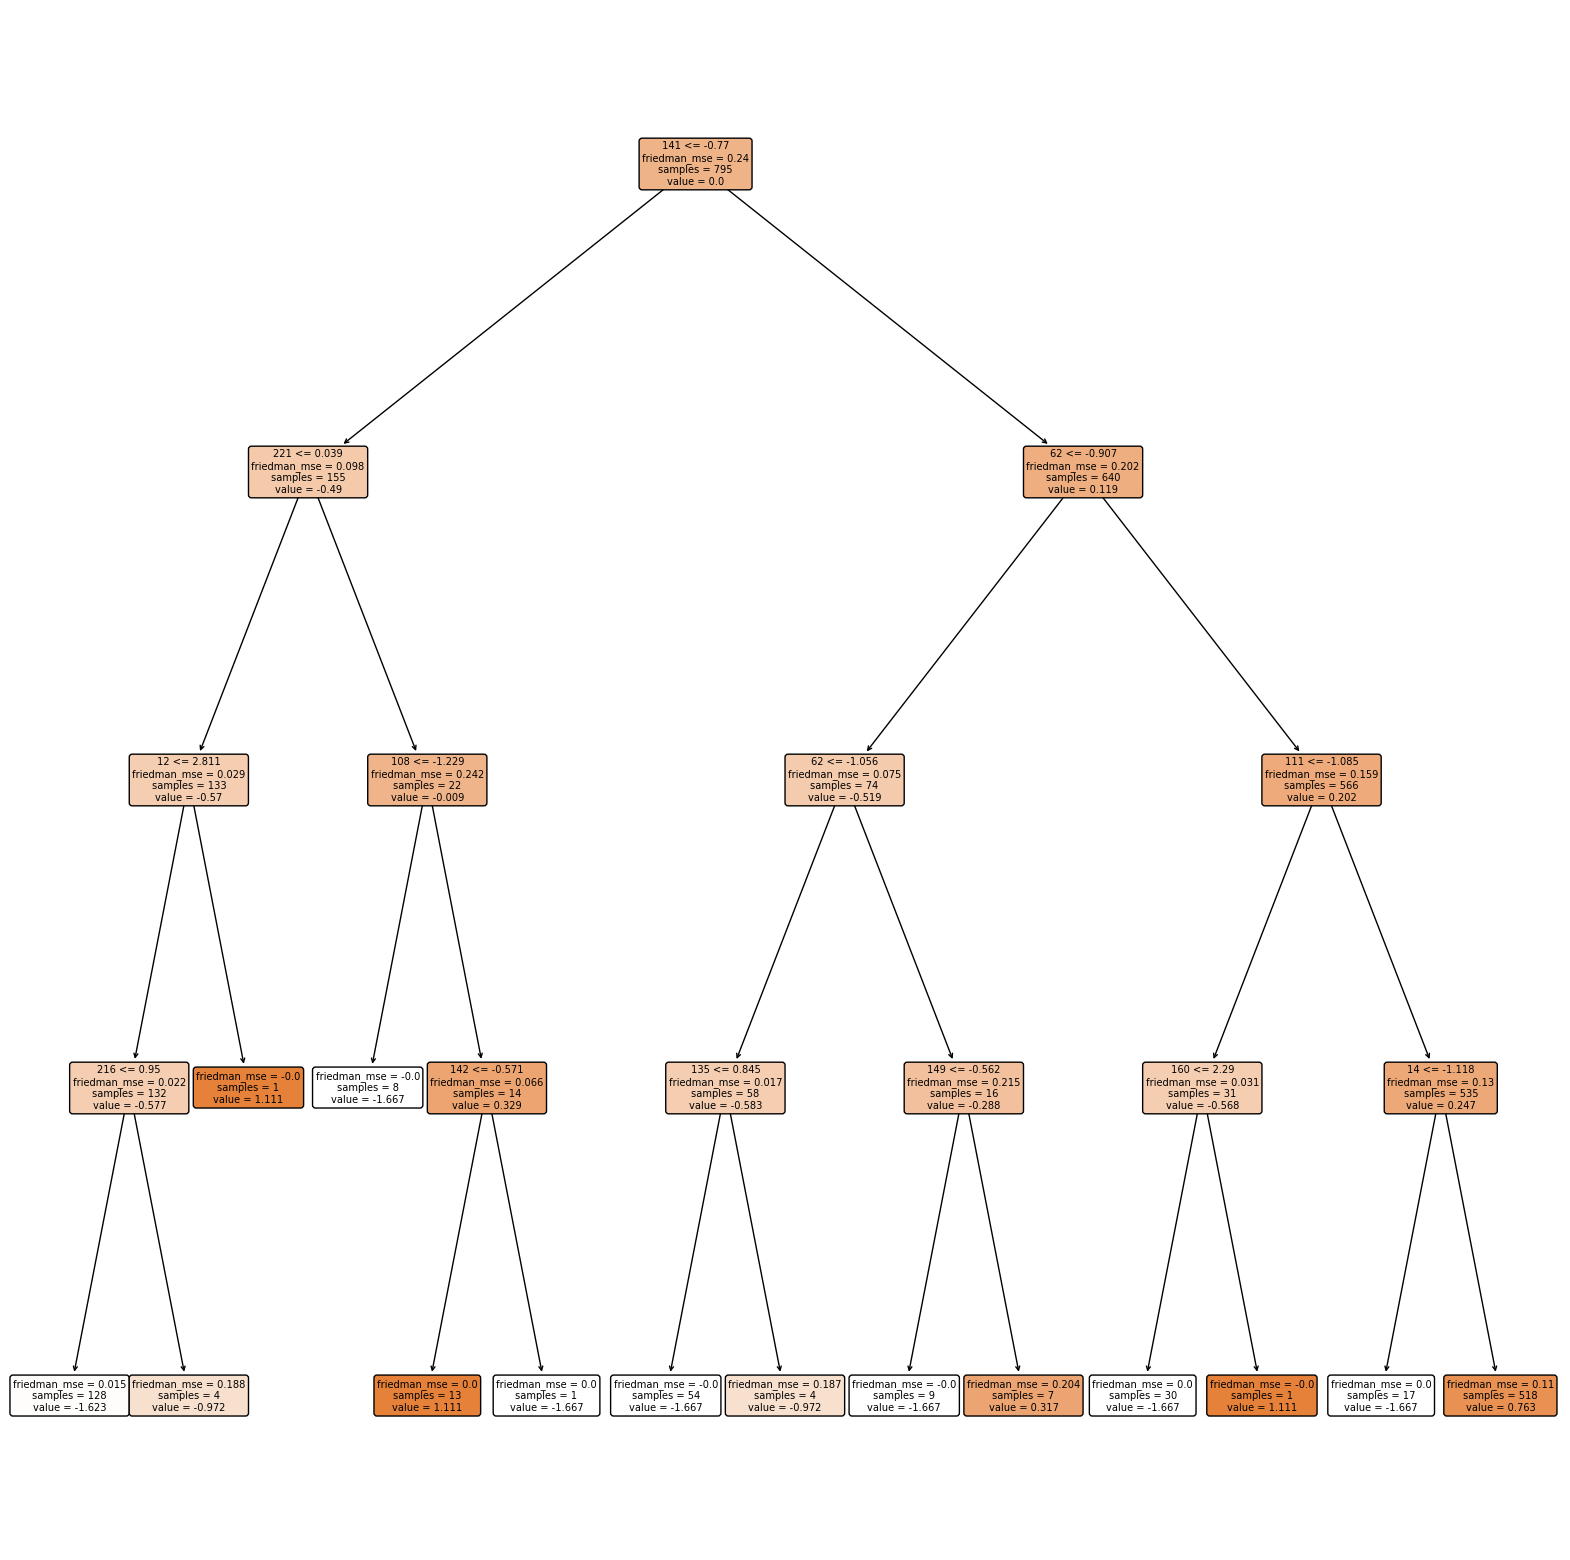

In [11]:
# plot tree
from sklearn.tree import plot_tree

# plot tree
plt.figure(figsize=(20, 20))
plot_tree(gbc_model.estimators_[0, 0], filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1', '2'])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [14]:
# get accuracy, F1 score, precision, and recall
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(classification_report(y_test, y_pred))

# confusion matrix
confusion_matrix(y_test, y_pred)

Accuracy: 0.9296482412060302
F1 Score: 0.9278661470792907
Precision: 0.9301978025453784
Recall: 0.9296482412060302
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       119
           1       0.89      0.95      0.92        42
           2       0.94      0.76      0.84        38

    accuracy                           0.93       199
   macro avg       0.92      0.90      0.91       199
weighted avg       0.93      0.93      0.93       199



array([[116,   1,   2],
       [  2,  40,   0],
       [  5,   4,  29]])

<AxesSubplot: >

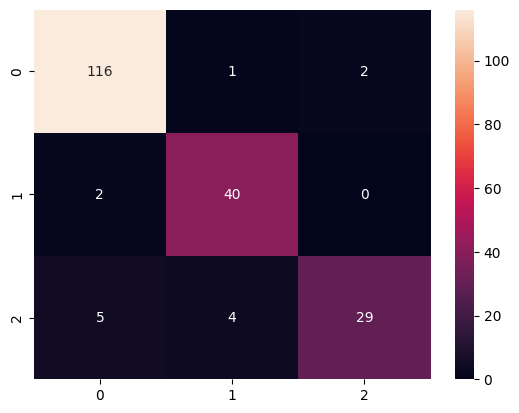

In [15]:
# graph heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [16]:
# roc and auc for multiclass classification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [19]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot 
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# function to classify target_class from a list of rr_interval values
def classify_target_class(rr_interval_lst):
    # create dataframe with rr_interval values
    df = pd.DataFrame(rr_interval_lst, columns=['rr_interval'])
    # add index column
    df['index'] = df.index
    # transform data so that index and target_class are columns and rr_interval are values
    # keep target_class as a column
    df_copy = df.pivot(index=['sample_id', 'target_class'], columns='index', values='rr_interval')
    # remove multi-index
    df_copy = df_copy.reset_index()
    # drop sample_id column
    df_copy = df_copy.drop(columns=['sample_id'])
    # scale all columns except for target_class
    df_copy.iloc[:, 1:] = scaler.transform(df_copy.iloc[:, 1:])
    # impute missing values with mean
    df_copy = df_copy.fillna(df_copy.mean())
    # predict target_class
    target_class = gbc_best.predict(df_copy)
    # return target_class
    return target_class

In [ ]:
# roc and auc for multiclass classification

